<a href="https://colab.research.google.com/github/Alyssl24/MINST/blob/main/ClassifieurR%C3%A9seaudeNeurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os


In [ ]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 54454892.27it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1604786.36it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13388567.65it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7836498.88it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
from torch.utils.data import DataLoader #permet de parcourir
batch_size_choose=32
train_dataloader = DataLoader(training_data, batch_size=batch_size_choose, shuffle=True) #le shuffle permet de melanger le set de data
test_dataloader = DataLoader(test_data, batch_size=batch_size_choose, shuffle=True)


In [ ]:
#fonction qui verifie si c correct ou nn
def correct(output, target):
    predicted_digits = output.argmax(1)                            # pick digit with largest network output
    correct_ones = (predicted_digits == target).type(torch.float)  # 1.0 for correct, 0.0 for incorrect
    return correct_ones.sum().item()

In [ ]:
#boucle qui traite chaques lots de données (data et target sont des listes)
#Notre BD est separé en lot par le dataloader(qui s"appelle batch)
#puis chaque batch est traite par ses boucles simultanées
def train(data_loader, model, criterion, optimizer):
    model.train()
    num_batches = len(data_loader)
    num_items = len(data_loader.dataset)

    total_loss = 0
    total_correct = 0
    for data, target in data_loader:
        # Do a forward pass
        output = model(data)

        # Calculate the loss
        loss = criterion(output, target)
        total_loss += loss

        # Count number of correct digits

        total_correct += correct(output, target)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    train_loss = total_loss/num_batches
    accuracy = total_correct/num_items
    print(f"Average loss: {train_loss:7f}, accuracy: {accuracy:.2%}")

In [ ]:
#version ou j'essaie de recup les couches
from collections import OrderedDict as OrderedDict
#ordered dict c un dico ordonnée mais jrv pas a recup les couches encores
class SimpleMLP(nn.Module):
    def __init__(self):

        super().__init__()
        self.flatt=nn.Flatten()
        self.line1=nn.Linear(28*28, 255)
        self.relu=nn.ReLU()
        self.line2=nn.Linear(255,128)
        self.line3=nn.Linear(128,2)
        self.line4=nn.Linear(2, 10)
        self.dim2=0;

    def forward(self, x):

        x=self.flatt(x)
        x=self.relu(x)
        x=self.line1(x)
        x=self.relu(x)
        x=self.line2(x)
        x=self.relu(x)
        x=self.line3(x)
        x=self.relu(x)
        self.dim2=x
        x=self.line4(x)

        return torch.nn.functional.softmax(x, dim = 1)

    def forward_2dim(self,x):
        self.forward(x)
        return self.dim2

In [ ]:
#CREATION DE NOTRE MODELE
model = SimpleMLP()
print(model)

SimpleMLP(
  (flatt): Flatten(start_dim=1, end_dim=-1)
  (line1): Linear(in_features=784, out_features=255, bias=True)
  (relu): ReLU()
  (line2): Linear(in_features=255, out_features=128, bias=True)
  (line3): Linear(in_features=128, out_features=2, bias=True)
  (line4): Linear(in_features=2, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()   #choix du meilleur critere d'erreur
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
epochs = 10
for epoch in range(epochs):
   print(f"Epoch: {epoch+1} ...")
   train(train_dataloader, model, criterion, optimizer)

Epoch: 1 ...


In [ ]:
def test(test_loader, model, criterion):
    model.eval()

    num_batches = len(test_loader)
    num_items = len(test_loader.dataset)

    test_loss = 0
    total_correct = 0

    with torch.no_grad():
        for data, target in test_loader:

            # Do a forward pass
            output = model(data)

            # Calculate the loss
            loss = torch.nn.functional.nll_loss(output, target)
            test_loss += loss.item()

            # Count number of correct digits
            total_correct += correct(output, target)

    test_loss = test_loss/num_batches
    accuracy = total_correct/num_items

    print(f"Testset accuracy: {100*accuracy:>0.1f}%, average loss: {test_loss:>7f}")

In [ ]:
test(test_dataloader, model, criterion)

Testset accuracy: 95.4%, average loss: -0.951604


In [ ]:
def liste_Couleur(cible):
  liste_c=[]
  for i in cible:
    if i==0:
      liste_c.append('#FF0000')
    elif i==1:
      liste_c.append( '#00FF00')
    elif i==2:
      liste_c.append( '#0000FF')
    elif i==3:
      liste_c.append( '#00FFFF')
    elif i==4:
      liste_c.append( '#FF00FF')
    elif i==5:
      liste_c.append('#FFC0CB')
    elif i==6:
      liste_c.append( '#FFFF00')
    elif i==7:
      liste_c.append( '#FFA500')
    elif i==8:
      liste_c.append('#800080')
    else: #c 9
      liste_c.append('#808080')
  return liste_c

def trouverTarget(tableau):
     max=tableau[0]
     maxi=0
     for i in range(1,len(tableau)):
         if tableau[i]>max:
             maxi=i
             max=tableau[i]
     return maxi

In [ ]:
X=[]
Y=[]
res=[]
resultat=[]
targ_liste=[]
for data,target in test_dataloader: #car dans dataloader c un tuple avec donnee,target
    output = model.forward_2dim(data)
    res = model.forward(data)
    output=output.tolist()
    targ_liste= targ_liste+ res.tolist()

    for coord in output:
        X.append(coord[0])
        Y.append(coord[1])


for r in targ_liste:
  resultat.append(trouverTarget(r))
print(len(resultat))

10000


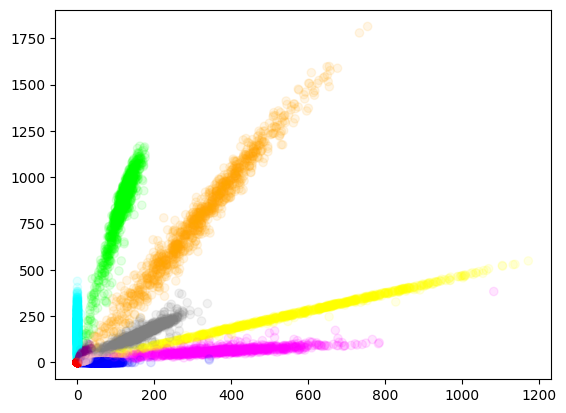

In [ ]:
import matplotlib.pyplot as plt

list_c=liste_Couleur(resultat)


plt.scatter(x=X,y=Y,c=list_c,alpha=0.1)